In [59]:
import pandas as pd 
import os   
import matplotlib.pyplot as plt
import matplotlib 
import time 
from IPython.core.display import display, HTML
import ast
import seaborn as sns
import geopandas as gpd

#display(HTML("<style>.container { width:100% !important; }</style>"))

In [60]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
data_oscars

Wall time: 143 ms


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [61]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
# ELIMINAMOS DATOS NULOS
data_oscars = data_oscars.dropna()

# MODIFICAMOS MOMENTANEAMENTE EL NOMBRE PARA PODER GENERAR DATAFRAME
for ind in data_oscars.index:
    film,year = data_oscars['film'][ind],data_oscars['year_film'][ind] 
    data_oscars['film'][ind]=f'{film}[{year}]' 
    
# GENERAMOS UNA LISTA CON CADA PELICULA DISTINTA, DIFERENCIADAS POR SU TITULO Y AÑO PARA NO AGRUPAR REMASTERIZACIONES
movies = []
nominaciones = []
wins = []
for movie in data_oscars['film']:
    if movie not in movies:
        movies.append(movie)

for movie in movies:
    nomin = len(data_oscars[data_oscars['film']==movie])
    nominaciones.append(nomin)
    ganadas = len(data_oscars[(data_oscars['film']==movie)&(data_oscars['winner']==True)])
    wins.append(ganadas)

# GENERAMOS DATAFRAME
diccionario_df = {'Pelicula': movies, 'Nominaciones': nominaciones, 'Premios': wins} 

df = pd.DataFrame(diccionario_df)
#ese es de las nominaciones
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Wall time: 24 s


,Pelicula,Nominaciones,Premios
0,The Noose[1927],1,0
1,The Last Command[1927],2,1
2,A Ship Comes In[1927],1,0
3,7th Heaven[1927],5,3
4,Sadie Thompson[1927],1,0
...,...,...,...
4929,A Sister[2019],1,0
4930,Ad Astra[2019],1,0
4931,Avengers: Endgame[2019],1,0
4932,The Lion King[2019],1,0


In [62]:
%%time
data_ratings = pd.read_csv(os.path.join("ratings_small.csv","ratings_small.csv"))

movies_id = []
ratings = []
cant_ratings = []
for Id in data_ratings['movieId'].unique():
    movies_id.append(Id)
    ratings.append(round(data_ratings[data_ratings['movieId']==Id]['rating'].mean(),1))
    cant_ratings.append(len(data_ratings[data_ratings['movieId']==Id]))

diccionario_ratings = {'IdPelicula': movies_id, 'RatingProm': ratings, 'Cant_Ratings': cant_ratings} 

df_ratings = pd.DataFrame(diccionario_ratings)
df_ratings

Wall time: 17.6 s


,IdPelicula,RatingProm,Cant_Ratings
0,31,3.2,42
1,1029,3.7,42
2,1061,3.5,33
3,1129,3.3,48
4,1172,4.3,46
...,...,...,...
9061,64997,2.5,1
9062,72380,3.5,1
9063,129,3.0,1
9064,4736,1.0,1


In [63]:
data_movies = pd.read_csv(os.path.join("movies_metadata.csv","movies_metadata.csv"))
data_movies.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [64]:
# Ocupamos ciertas columnas con las cuales se trabajaran
columns = ['title', 'original_title', 'genres', 'id', 'imdb_id', 'original_language', 'popularity', 'release_date', 'production_countries', 'runtime']
data_movies = data_movies[columns]
#Eliminamos los datos Nulos 
data_movies = data_movies.dropna()
# eliminamos todas las peliculas que no tengan genero
data_movies = data_movies.drop(data_movies[data_movies['genres']== '[]'].index)
# cambiamos el id a int ya que haremos un merge y en el otro dataset se encuentra como variable int64
data_movies['id'] = data_movies['id'].astype('int64')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42797 entries, 0 to 45463
Data columns (total 10 columns):
title                   42797 non-null object
original_title          42797 non-null object
genres                  42797 non-null object
id                      42797 non-null int64
imdb_id                 42797 non-null object
original_language       42797 non-null object
popularity              42797 non-null object
release_date            42797 non-null object
production_countries    42797 non-null object
runtime                 42797 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.6+ MB


In [65]:
# Merge entre las peliculas y sus ratings
movie_ratings = pd.merge(data_movies, df_ratings, left_on = 'id', right_on = 'IdPelicula', how = 'left')
movie_ratings = movie_ratings.dropna().reset_index(drop=True)
# cambiamos a datetime la columna release_date
movie_ratings.release_date = pd.to_datetime(movie_ratings['release_date'])
# obtenemos el ano de esta columna datetime
movie_ratings["year"] = movie_ratings.release_date.dt.year
print(movie_ratings.shape)
movie_ratings.sort_values('year').head()
# no se ocupa ya que son pocos los datos que quedan luego de hacer el merge

(2798, 14)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,IdPelicula,RatingProm,Cant_Ratings,year
2243,The Arrival of a Train at La Ciotat,L'arrivée d'un train en gare de La Ciotat,"[{'id': 99, 'name': 'Documentary'}]",160,tt0000012,es,5.25661,1896-01-25,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,160.0,2.3,63.0,1896
2797,The One-Man Band,L'Homme orchestre,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",49280,tt0135453,fr,1.109068,1900-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,49280.0,5.0,1.0,1900
1508,A Trip to the Moon,Le Voyage dans la Lune,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",775,tt0000417,fr,6.3218,1902-09-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",14.0,775.0,2.0,1.0,1902
2785,Extraordinary Illusions,Illusions funambulesques,"[{'id': 35, 'name': 'Comedy'}]",127098,tt0223509,fr,0.141611,1903-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2.0,127098.0,4.0,1.0,1903
2202,Frankenstein,Frankenstein,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",2929,tt0001223,en,1.65988,1910-03-18,"[{'iso_3166_1': 'US', 'name': 'United States o...",13.0,2929.0,3.9,14.0,1910


In [66]:
# por lo tanto ocupamos otro dataset en donde tienen mas calificaciones de usuarios para las peliculas
data_ratings_externo = pd.read_csv(os.path.join("ratings_externo","IMDb ratings.csv"))
# columnas que nos serviran
columnas = ['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote']
data_ratings_externo = data_ratings_externo[columnas]
data_ratings_externo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 4 columns):
imdb_title_id            85855 non-null object
weighted_average_vote    85855 non-null float64
total_votes              85855 non-null int64
mean_vote                85855 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ MB


In [67]:
# hacemos el merge como antes pero ahora relacionandolo con el imdb_id de cada pelicula
movie_ratings_2 = pd.merge(data_movies, data_ratings_externo, left_on = 'imdb_id', right_on = 'imdb_title_id', how = 'left')
movie_ratings_2 = movie_ratings_2.dropna().reset_index(drop=True)
# convertimos a datetime la columna 'release_date'
movie_ratings_2.release_date = pd.to_datetime(movie_ratings_2['release_date'])
# obtenemos el ano de esto 
movie_ratings_2["year"] = movie_ratings_2.release_date.dt.year
# hacemos una limpieza de los anos, ya que sera comparado con los oscars y estos toman las peliculas desde el ano 1927 
movie_ratings_2 = movie_ratings_2.drop(movie_ratings_2[movie_ratings_2['year'] < 1927].index)
# se puede ver que perdimos menos registros con este dataset, por lo tanto nos quedaremos con el 
print(movie_ratings_2.shape)
movie_ratings_2.head()

(32580, 15)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,imdb_title_id,weighted_average_vote,total_votes,mean_vote,year
0,Toy Story,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.9469,1995-10-30,"[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,tt0114709,8.3,864461.0,8.3,1995
1,Jumanji,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.0155,1995-12-15,"[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,tt0113497,7.0,299083.0,7.1,1995
2,Grumpier Old Men,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,tt0113228,6.7,23742.0,6.8,1995
3,Waiting to Exhale,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.85949,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,tt0114885,5.9,9353.0,6.2,1995
4,Father of the Bride Part II,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.38752,1995-02-10,"[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,tt0113041,6.1,33587.0,6.2,1995


In [68]:
# necesitamos los generos para crear un dataframe y hacer un grafico para lograr hacer un analisis de los datos 
genres = movie_ratings_2['genres']
genre_movie = []
generos_totales = []
for i in genres:
    genre = ''
    generos_pelicula = i.split("'")[5::6]
    for j in generos_pelicula:
        if j not in generos_totales:
            generos_totales.append(j)
    for x in range(len(generos_pelicula)):
        if x < len(generos_pelicula) -1:
            genre+=f'{generos_pelicula[x]},'
        else:
            genre+=generos_pelicula[x]
    genre_movie.append(genre)
movie_ratings_2['genres'] = genre_movie

In [69]:
# creamos un dataframe con todos los generos y cada columna si tiene un 0 quiere decir que la pelicula no pertenece a ese genero, si tiene un 1 quiere decir que pertenece la pelicula a ese genero
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas por ano se filman para cada genero 
df_genre['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas
genero_peliculas_ano = df_genre.groupby('year').sum()
# hacemos sort para ver el grafico en orden
genero_peliculas_ano_sumados = genero_peliculas_ano.sum().sort_values(ascending=False)

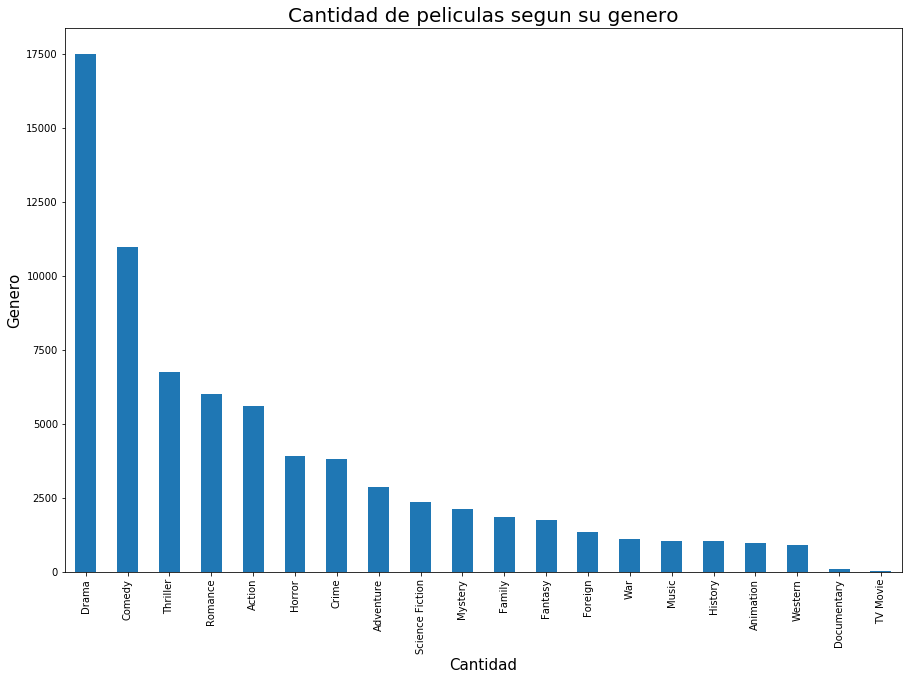

In [70]:
#grafico de cuantas peliculas se generan 
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = genero_peliculas_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas segun su genero', fontsize = 20)
plt.ylabel('Genero', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

In [71]:
# agregamos las columnas de 0 y 1 al dataframe movie_ratings_2
#df_genre = pd.DataFrame()
#for genre in generos_totales:
    #df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
#movie_ratings_2 = movie_ratings_2.join(df_genre) unir los generos con el movie_ratings_2 columans de 1 y 0

In [72]:
%%time
paises = []
for ind in movie_ratings_2['production_countries'].index:
    x = ast.literal_eval(movie_ratings_2['production_countries'][ind])
    if len(x) > 0:
        countries = []
        countries_str = ''
        for dat in x:
            pais = dat['name']
            countries.append(dat['name'])
            countries_str += f'{pais},'
            if dat['name'] not in paises:
                paises.append(dat['name'])
    #movie_ratings_2['production_countries'][ind] = countries
    movie_ratings_2['production_countries'][ind] = countries_str


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Wall time: 15.3 s


In [73]:
# hacemos el mismo analisis hecho anteriormente, pero ahora con los paises, veremos cuanta produccion de peliculas tiene cada pais 
df_countries = pd.DataFrame()
for pais in paises:
    df_countries[pais] = movie_ratings_2['production_countries'].str.contains(pais).map(lambda x:1 if x else 0)

In [74]:
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas se filman en un pais
df_countries['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas por pais
peliculas_pais_ano = df_countries.groupby('year').sum()
# hacemos sort para ver el grafico en orden
peliculas_pais_ano_sumados = peliculas_pais_ano.sum().sort_values(ascending=False)

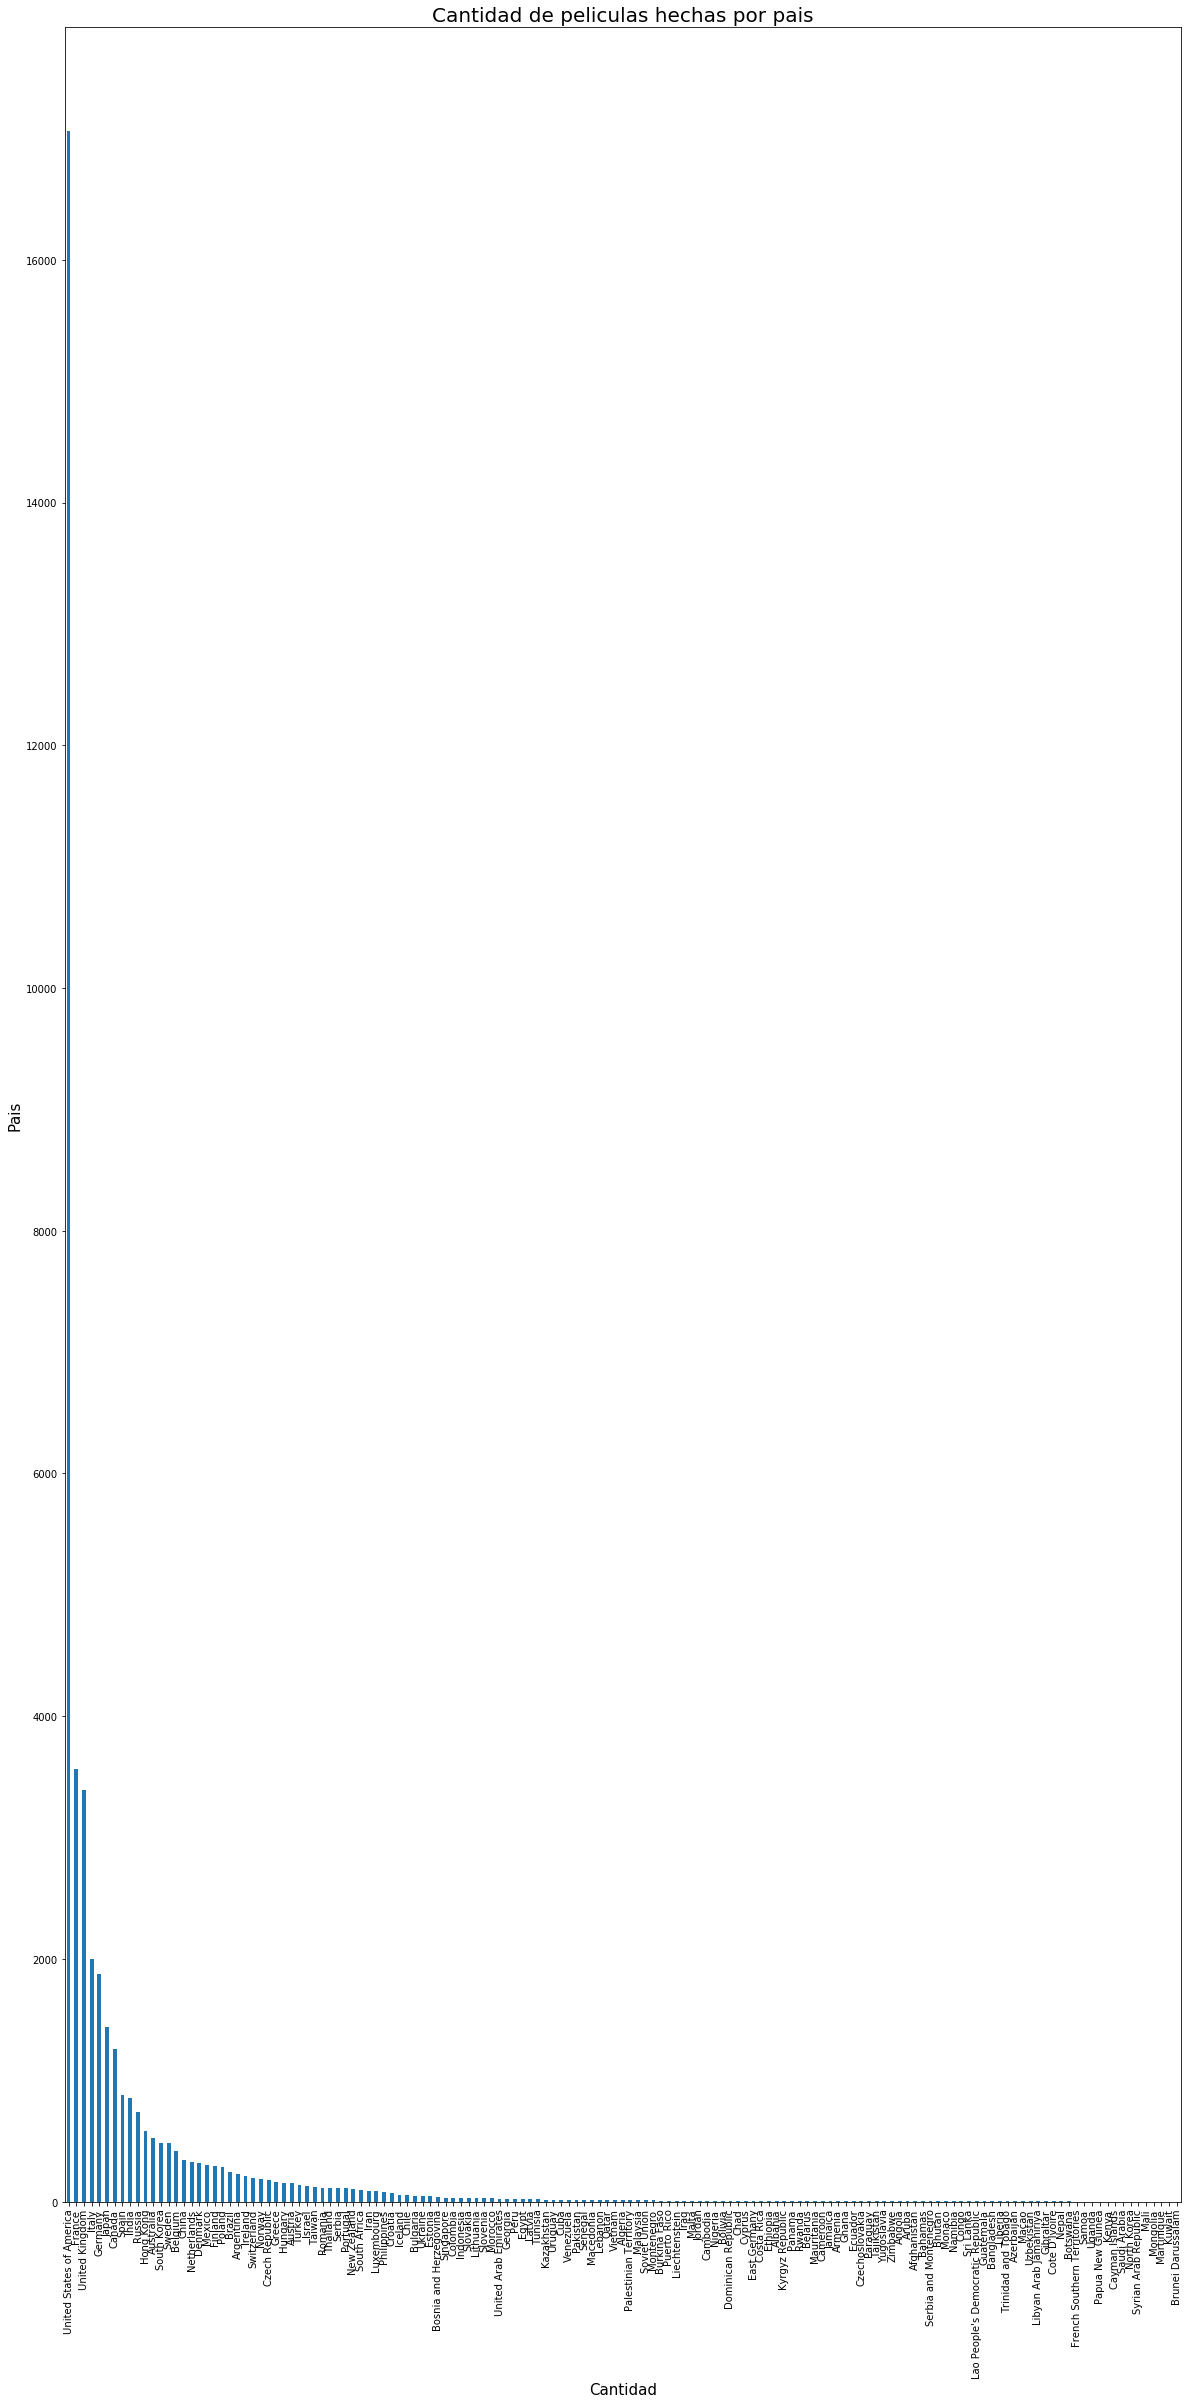

In [75]:
#grafico de cuantas peliculas en un pais se generan
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = peliculas_pais_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas hechas por pais', fontsize = 20)
plt.ylabel('Pais', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

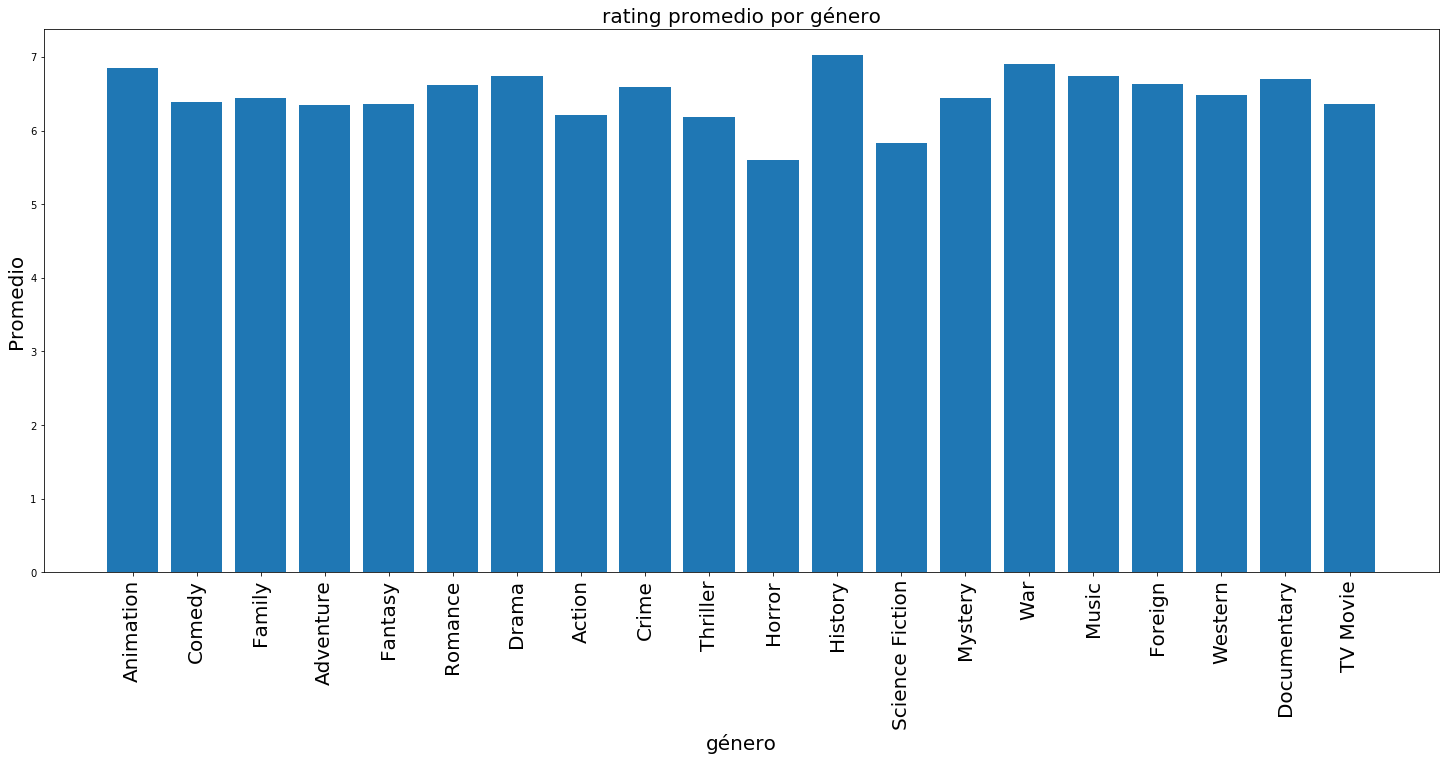

1.8943467140197754


In [76]:
start = time.time()
genres = {}
for genre in movie_ratings_2['genres']:
    for g in genre.split(','):
        if g not in genres:
            genres[g] = []

for ind in movie_ratings_2.index:
    gen = movie_ratings_2['genres'][ind].split(',')
    for g in gen:
        genres[g].append(movie_ratings_2['mean_vote'][ind])

for genre in genres:
    genres[genre] = sum(genres[genre])/len(genres[genre])

names = list(genres.keys())
values = list(genres.values())

fig = plt.figure(figsize=(25,10))
plt.bar(range(len(genres)), values, tick_label=names)
plt.xticks(rotation=90, fontsize = 20)
plt.title('rating promedio por género', fontsize = 20)
plt.ylabel('Promedio', fontsize = 20)
plt.xlabel('género', fontsize = 20)
plt.show()
end = time.time()
print(end - start)

In [77]:
# ocupamos tittle y el ano para poder hacer merge con el dataset de los oscars 
title = movie_ratings_2['title'].to_list()
ano = movie_ratings_2['year'].to_list()
pelicula_ano = []
for i in range(len(title)):
    movie= title[i]
    year = ano[i]
    movie_year = f'{movie}[{year}]'
    pelicula_ano.append(movie_year)
movie_ratings_2['Pelicula'] = pelicula_ano
columns = ['Pelicula','runtime','genres','mean_vote']
movies_ratings_2_merge = movie_ratings_2[columns]
movies_ratings_2_merge.head()

,Pelicula,runtime,genres,mean_vote
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2
4,Father of the Bride Part II[1995],106.0,Comedy,6.2


In [78]:
# hacemos el merge segun el title con los oscars
movie_oscars = pd.merge(movies_ratings_2_merge, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars = movie_oscars.dropna().reset_index(drop=True)
print(movie_oscars.shape)
movie_oscars.sort_values('Nominaciones', ascending = False).head()

(2447, 6)


,Pelicula,runtime,genres,mean_vote,Nominaciones,Premios
335,Titanic[1997],194.0,"Drama,Romance,Thriller",7.8,14.0,11.0
2409,La La Land[2016],128.0,"Comedy,Drama,Music,Romance",7.9,14.0,6.0
995,Chicago[2002],113.0,"Action,Comedy,Crime,Drama,Music",7.3,13.0,6.0
888,The Lord of the Rings: The Fellowship of the R...,178.0,"Adventure,Fantasy,Action",8.7,13.0,4.0
141,Gone with the Wind[1939],238.0,"Drama,Romance,War",8.1,13.0,8.0


In [79]:
"""
Descargamos geodataset para relacionar país con calidad y recepción de producciones.
Sjoin debe ser por columna "sovereight"
"""
url = 'https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=America/Santo_Domingo&lang=en'
gdf_paises = gpd.read_file(url)
gdf_paises

,labelrank,woe_id,pop_est,sovereignt,wikidataid,continent,max_label,brk_name,name_ko,name_id,...,iso_a3_eh,min_label,name_hu,abbrev,name_hi,note_adm0,note_brk,formal_fr,name_alt,geometry
0,5,23424839,10646714,Haiti,Q790,North America,9.0,Haiti,아이티,Haiti,...,HTI,4.0,Haiti,Haiti,हैती,None,None,None,None,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
1,3,23424824,27499924,Ghana,Q117,Africa,8.0,Ghana,가나,Ghana,...,GHA,3.0,Ghána,Ghana,घाना,None,None,None,None,"POLYGON ((0.02380 11.01868, -0.04978 10.70692,..."
2,4,23424860,10248069,Jordan,Q810,Asia,9.0,Jordan,요르단,Yordania,...,JOR,4.0,Jordánia,Jord.,जॉर्डन,None,None,None,None,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
3,3,23424763,55123814,Myanmar,Q836,Asia,8.0,Myanmar,미얀마,Myanmar,...,MMR,3.0,Mianmar,Myan.,म्यान्मार,None,None,None,None,"POLYGON ((100.11599 20.41785, 99.54331 20.1866..."
4,5,23424770,758288,Bhutan,Q917,Asia,9.0,Bhutan,부탄,Bhutan,...,BTN,4.0,Bhután,Bhutan,भूटान,None,None,None,None,"POLYGON ((91.69666 27.77174, 92.10371 27.45261..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,-90,37345935,Sudan,Q1049,Africa,8.0,Sudan,수단,Sudan,...,SDN,3.0,Szudán,Sudan,सूडान,None,None,None,None,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
173,2,23424936,142257519,Russia,Q159,Europe,5.2,Russia,러시아,Rusia,...,RUS,1.7,Oroszország,Rus.,रूस,None,None,None,None,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
174,3,23424883,25054161,Madagascar,Q1019,Africa,7.0,Madagascar,마다가스카르,Madagaskar,...,MDG,3.0,Madagaszkár,Mad.,मेडागास्कर,None,None,None,None,"POLYGON ((49.54352 -12.46983, 49.80898 -12.895..."
175,4,23424750,8754413,Austria,Q40,Europe,8.0,Austria,오스트리아,Austria,...,AUT,3.0,Ausztria,Aust.,ऑस्ट्रिया,None,None,None,None,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."


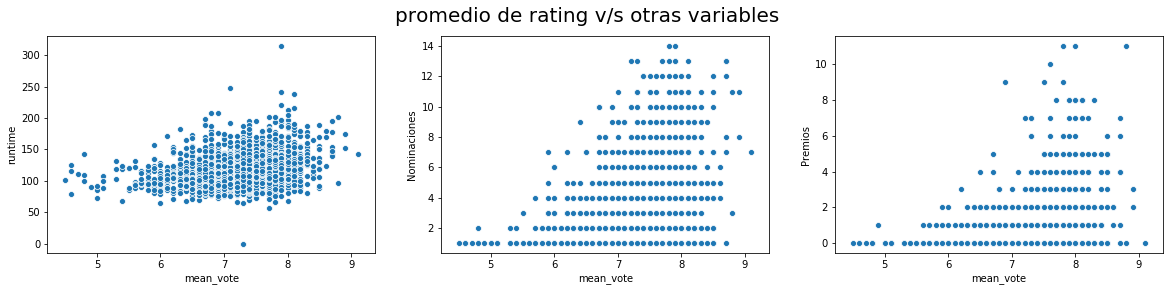

In [80]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,4))
fig.suptitle('promedio de rating v/s otras variables', size=(20))

sns.scatterplot(ax = axes[0], data=movie_oscars, x="mean_vote", y='runtime')


sns.scatterplot(ax = axes[1], data=movie_oscars, x="mean_vote", y='Nominaciones')


sns.scatterplot(ax = axes[2], data=movie_oscars, x="mean_vote", y='Premios')

In [81]:
movie_oscars

,Pelicula,runtime,genres,mean_vote,Nominaciones,Premios
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,3.0,0.0
1,Sabrina[1995],127.0,"Comedy,Romance",6.5,2.0,0.0
2,The American President[1995],106.0,"Comedy,Drama,Romance",7.0,1.0,0.0
3,Nixon[1995],192.0,"History,Drama",7.1,4.0,0.0
4,Casino[1995],178.0,"Drama,Crime",8.2,1.0,0.0
...,...,...,...,...,...,...
2442,War for the Planet of the Apes[2017],140.0,"Drama,Science Fiction,War",7.5,1.0,0.0
2443,The Glass Cell[1978],93.0,"Drama,Crime",6.9,1.0,0.0
2444,On Body and Soul[2017],116.0,"Drama,Romance",7.6,1.0,0.0
2445,Dunkirk[2017],107.0,"Action,Drama,History,Thriller,War",7.8,8.0,3.0


In [82]:
movie_ratings_2

,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,imdb_title_id,weighted_average_vote,total_votes,mean_vote,year,Pelicula
0,Toy Story,Toy Story,"Animation,Comedy,Family",862,tt0114709,en,21.9469,1995-10-30,"United States of America,",81.0,tt0114709,8.3,864461.0,8.3,1995,Toy Story[1995]
1,Jumanji,Jumanji,"Adventure,Fantasy,Family",8844,tt0113497,en,17.0155,1995-12-15,"United States of America,",104.0,tt0113497,7.0,299083.0,7.1,1995,Jumanji[1995]
2,Grumpier Old Men,Grumpier Old Men,"Romance,Comedy",15602,tt0113228,en,11.7129,1995-12-22,"United States of America,",101.0,tt0113228,6.7,23742.0,6.8,1995,Grumpier Old Men[1995]
3,Waiting to Exhale,Waiting to Exhale,"Comedy,Drama,Romance",31357,tt0114885,en,3.85949,1995-12-22,"United States of America,",127.0,tt0114885,5.9,9353.0,6.2,1995,Waiting to Exhale[1995]
4,Father of the Bride Part II,Father of the Bride Part II,Comedy,11862,tt0113041,en,8.38752,1995-02-10,"United States of America,",106.0,tt0113041,6.1,33587.0,6.2,1995,Father of the Bride Part II[1995]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32826,House of Horrors,House of Horrors,"Horror,Mystery,Thriller",84419,tt0038621,en,0.222814,1946-03-29,"United States of America,",65.0,tt0038621,6.2,729.0,6.3,1946,House of Horrors[1946]
32827,Caged Heat 3000,Caged Heat 3000,Science Fiction,222848,tt0112613,en,0.661558,1995-01-01,"United States of America,",85.0,tt0112613,3.8,217.0,4.4,1995,Caged Heat 3000[1995]
32828,Robin Hood,Robin Hood,"Drama,Action,Romance",30840,tt0102797,en,5.683753,1991-05-13,"Canada,Germany,United Kingdom,United States of...",104.0,tt0102797,5.8,4583.0,6.1,1991,Robin Hood[1991]
32829,Century of Birthing,Siglo ng Pagluluwal,Drama,111109,tt2028550,tl,0.178241,2011-11-17,"Philippines,",360.0,tt2028550,7.1,190.0,7.1,2011,Century of Birthing[2011]


In [83]:
for ind in movie_ratings_2.index:
    print(ind)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3227


5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112


9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204


11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
1196

13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13674
13675
13676
13677
13678
13679
13680
13681
1368

16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
1654

18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
1844

19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
1990

21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21420
21421
21422
21423
21424
21425
2142

22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
2291

24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
2438

26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
2673

28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
28171
28172
28173
28174
28175
28176
28177
28178
28179
28180
28181
28182
28183
28184
28185
28186
28187
28188
28189
28190
28191
28192
28193
28194
28195
28196
2819

30086
30087
30088
30089
30090
30091
30092
30093
30094
30095
30096
30097
30098
30099
30100
30101
30102
30103
30104
30105
30106
30107
30108
30109
30110
30111
30112
30113
30114
30115
30116
30117
30118
30119
30120
30121
30122
30123
30124
30125
30126
30127
30128
30129
30130
30131
30132
30133
30134
30135
30136
30137
30138
30139
30140
30141
30142
30143
30144
30145
30146
30147
30148
30149
30150
30151
30152
30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
3025

32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
32809
32810
32811
32812
32813
32814
32815
32816
32817
32818
32819
32820
32821
32822
32823
32824
32825
32826
32827
32828
32829
32830


In [84]:
# hacemos el merge segun la Peliculacon los oscars
columns = ['Pelicula','runtime','genres','mean_vote', 'year']
movie_lr = movie_ratings_2[columns]
movie_oscars_lr = pd.merge(movie_lr, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars_lr.sort_values('mean_vote', ascending = False).head()
movie_oscars_lr.fillna(0, inplace=True)
movie_oscars_lr.head()

,Pelicula,runtime,genres,mean_vote,year,Nominaciones,Premios
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,1995,3.0,0.0
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1,1995,0.0,0.0
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8,1995,0.0,0.0
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2,1995,0.0,0.0
4,Father of the Bride Part II[1995],106.0,Comedy,6.2,1995,0.0,0.0


In [85]:
movie_oscars_lr

,Pelicula,runtime,genres,mean_vote,year,Nominaciones,Premios
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,1995,3.0,0.0
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1,1995,0.0,0.0
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8,1995,0.0,0.0
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2,1995,0.0,0.0
4,Father of the Bride Part II[1995],106.0,Comedy,6.2,1995,0.0,0.0
...,...,...,...,...,...,...,...
32575,House of Horrors[1946],65.0,"Horror,Mystery,Thriller",6.3,1946,0.0,0.0
32576,Caged Heat 3000[1995],85.0,Science Fiction,4.4,1995,0.0,0.0
32577,Robin Hood[1991],104.0,"Drama,Action,Romance",6.1,1991,0.0,0.0
32578,Century of Birthing[2011],360.0,Drama,7.1,2011,0.0,0.0


In [86]:
# ocupamos la lista generos creada anteriormente.
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_oscars_lr['genres'].str.contains(genre).map(lambda x:1 if x else 0)
movie_oscars_lr = movie_oscars_lr.join(df_genre) #unir los generos con el movie_oscars_lr columans de 1 y 0
movie_oscars_lr.head()


,Pelicula,runtime,genres,mean_vote,year,Nominaciones,Premios,Animation,Comedy,Family,...,Horror,History,Science Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV Movie
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,1995,3.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1,1995,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II[1995],106.0,Comedy,6.2,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
movie_oscars_lr=movie_oscars_lr.drop(['genres'], axis=1)

In [88]:
movie_oscars_lr

,Pelicula,runtime,mean_vote,year,Nominaciones,Premios,Animation,Comedy,Family,Adventure,...,Horror,History,Science Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV Movie
0,Toy Story[1995],81.0,8.3,1995,3.0,0.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji[1995],104.0,7.1,1995,0.0,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men[1995],101.0,6.8,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale[1995],127.0,6.2,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II[1995],106.0,6.2,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,House of Horrors[1946],65.0,6.3,1946,0.0,0.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
32576,Caged Heat 3000[1995],85.0,4.4,1995,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32577,Robin Hood[1991],104.0,6.1,1991,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32578,Century of Birthing[2011],360.0,7.1,2011,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [90]:
col = [i for i in movie_oscars_lr if i not in ['Pelicula', 'mean_vote']]

x = movie_oscars_lr[col]
y = movie_oscars_lr['mean_vote']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [91]:
true = y_test.values
pred = lr.predict(x_test)

In [92]:
%%time
# RMSE
((true-pred)**2).mean()

Wall time: 988 µs


0.7336286426692399

In [93]:
%%time
mean_squared_error(true, pred)

Wall time: 564 µs


0.7336286426692399

In [94]:
from sklearn.metrics import mean_absolute_error

In [95]:
%%time
mean_absolute_error(true, pred)

Wall time: 992 µs


0.6562521024403449

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


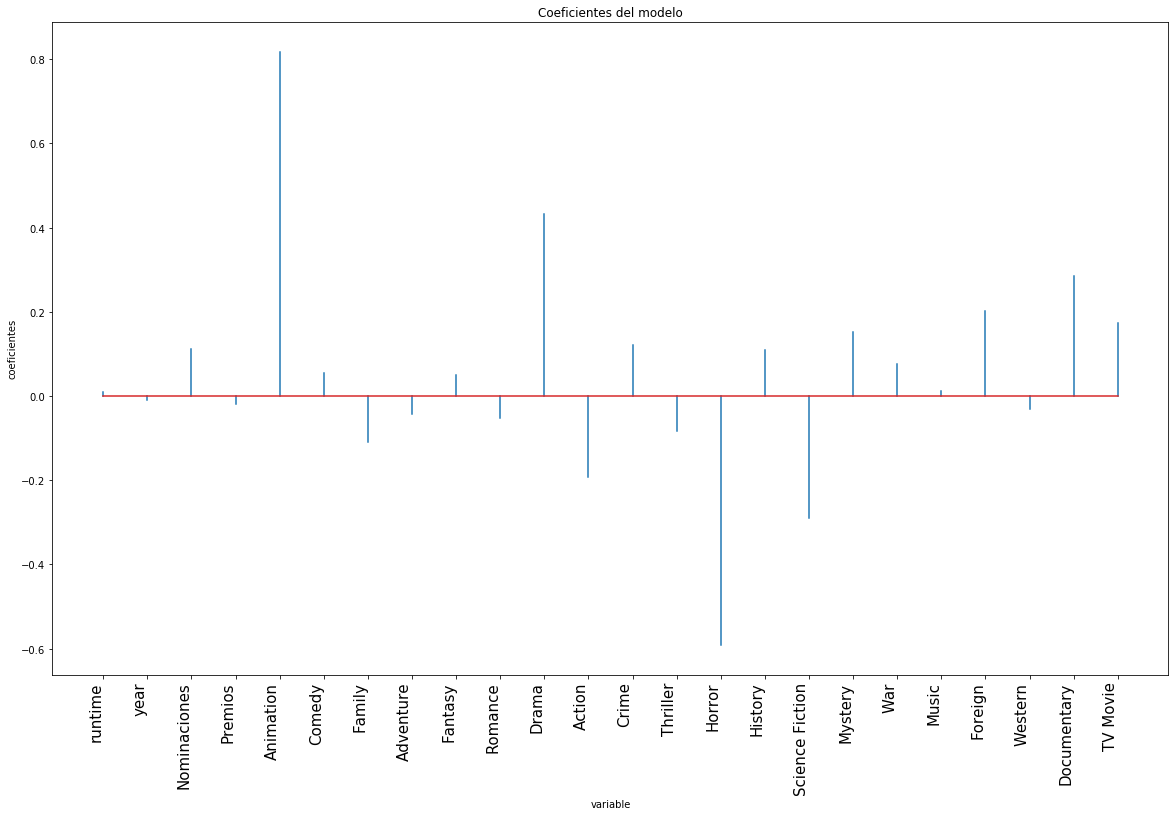

In [96]:
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': lr.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 12))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=15)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [97]:
import numpy as np

In [98]:
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = x_train, y = y_train)

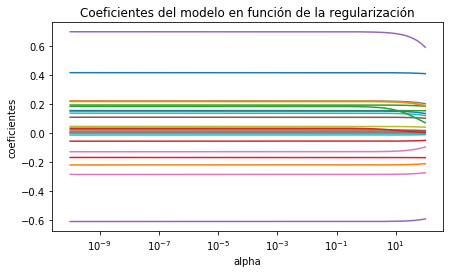

In [99]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(x_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

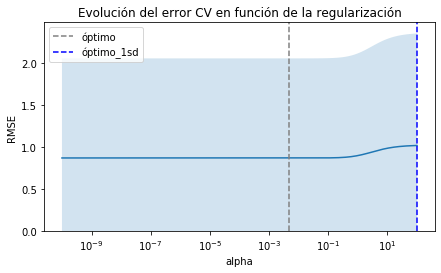

In [100]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [101]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.004552935074866948


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


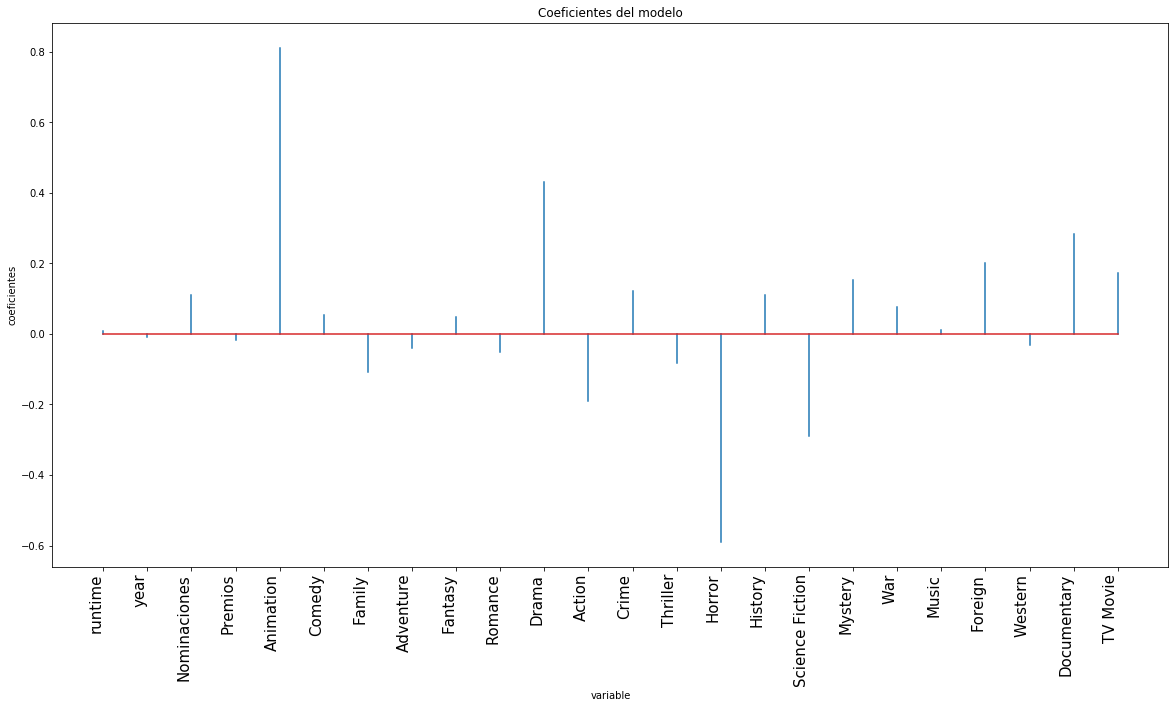

In [102]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=15)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [103]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': lr.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,runtime,0.008592
1,year,-0.008433
2,Nominaciones,0.111353
3,Premios,-0.018263
4,Animation,0.817489
5,Comedy,0.055531
6,Family,-0.109731
7,Adventure,-0.041387
8,Fantasy,0.049793
9,Romance,-0.051465


In [104]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,runtime,0.008551
1,year,-0.008387
2,Nominaciones,0.110625
3,Premios,-0.016193
4,Animation,0.811497
5,Comedy,0.054276
6,Family,-0.108085
7,Adventure,-0.041271
8,Fantasy,0.049273
9,Romance,-0.050223


In [105]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_validate

In [106]:
# Verificacion de las metricas para ver si nuestro modelo va por buen camino
metricas_cv = cross_validate(lr, x, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
test_r2 = np.mean(metricas_cv['test_r2'])
train_r2 = np.mean(metricas_cv['train_r2'])
mse_test = -(np.mean(metricas_cv['test_neg_mean_squared_error']))
mse_train = -(np.mean(metricas_cv['train_neg_mean_squared_error']))
print(f'----Linear Regresion----')
print(f'R2[Test]: {test_r2}')
print(f'R2[Train]: {train_r2}')
print(f'MSE[Test]: {mse_test}')
print(f'MSE[Train]: {mse_train}')

----Linear Regresion----
R2[Test]: 0.22928803961083144
R2[Train]: 0.2822491617089652
MSE[Test]: 0.7709886421794435
MSE[Train]: 0.7489500577803656


In [107]:
# Verificacion de las metricas para ver si nuestro modelo va por buen camino
metricas_cv = cross_validate(modelo, x, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
test_r2 = np.mean(metricas_cv['test_r2'])
train_r2 = np.mean(metricas_cv['train_r2'])
mse_test = -(np.mean(metricas_cv['test_neg_mean_squared_error']))
mse_train = -(np.mean(metricas_cv['train_neg_mean_squared_error']))
print(f'------Ridge Regresion------')
print(f'R2[Test]: {test_r2}')
print(f'R2[Train]: {train_r2}')
print(f'MSE[Test]: {mse_test}')
print(f'MSE[Train]: {mse_train}')

------Ridge Regresion------
R2[Test]: 0.2293163696358101
R2[Train]: 0.28224549298129636
MSE[Test]: 0.7709745241093672
MSE[Train]: 0.7489538892100248


In [109]:
for model in (lr, modelo):
    runtime=0
    year=0
    Nominaciones=0
    Premios=0
    Animation=0
    Comedy=0
    Family=0
    Adventure=0
    Fantasy=0
    Romance=0
    Drama=0
    Action=0
    Crime=0
    Thriller=0
    Horror=0
    History=0
    Science_Fiction=0
    Mystery=0
    War=0
    Music=0
    Foreign=0
    Western=0
    Documentary=0
    TV_Movie=0
    print(model.predict(np.array([[runtime,year,Nominaciones,Premios,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science_Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV_Movie]])))

[22.19647858]
[22.1093136]
